In [22]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Sam\Desktop\DA - DS\Portfolio\Data Sets\movie data sets\movies.csv')



df.head() # or  use df to view the full table


C:\Users\Sam\AppData\Local\Temp\ipykernel_9000\2508475228.py:21: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Sam\Desktop\DA - DS\Portfolio\Data Sets\movie data sets\movies.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [23]:
df.dropna(subset = ['revenue'], inplace = True) #  removes the rows where revenue is blank


# Numeric Budget - Convert from object to int32
nbg = df['budget'].astype(float)  

In [24]:
 df['budget']  = nbg

In [25]:
df.dtypes   # making sure both budget and revenue are in float64 format

adult                     object
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [26]:
# Finding correlations
df.corr(method = 'pearson')  # 3 methods exist: pearson, Kendall, Spearman

,budget,revenue,runtime,vote_average,vote_count
budget,1.000000,0.768776,0.134733,0.073494,0.676642
revenue,0.768776,1.000000,0.103917,0.083868,0.812022
runtime,0.134733,0.103917,1.000000,0.158146,0.113539
vote_average,0.073494,0.083868,0.158146,1.000000,0.123607
vote_count,0.676642,0.812022,0.113539,0.123607,1.000000


In [27]:
#  ↑↑↑↑↑↑↑↑↑↑↑↑↑  there is a high correlation 0.77 between budget & revenue 

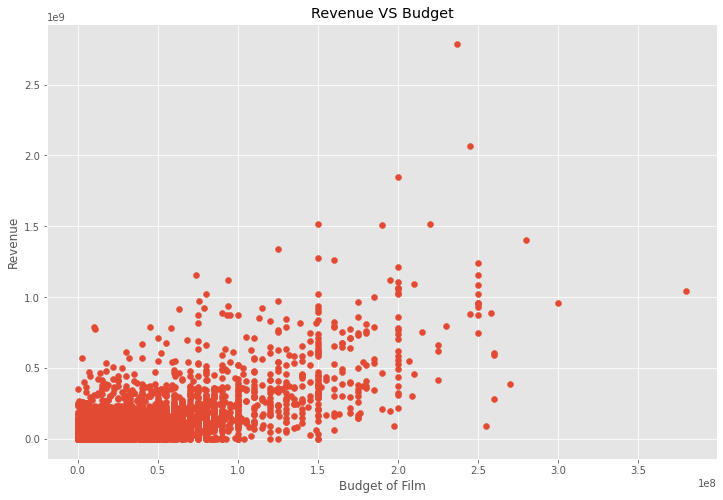

In [28]:
# Finding Correlations
# Scatter plot with budget vs growth
# make sure matplotlib is already run


plt.scatter(x=df['budget'], y=df['revenue'])


plt.title('Revenue VS Budget')
plt.xlabel ( 'Budget of Film')
plt.ylabel ( 'Revenue')
plt.show ()

<AxesSubplot:xlabel='budget', ylabel='revenue'>

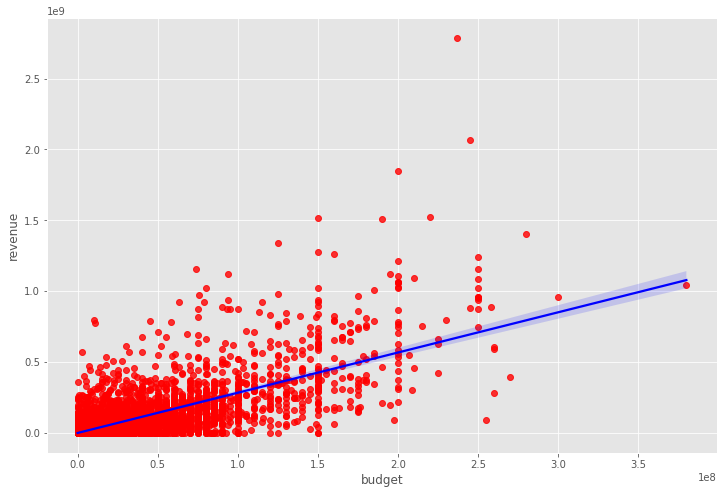

In [29]:
sns.regplot(x='budget',y='revenue',data=df ,  scatter_kws={"color": "red"}, line_kws={"color": "blue"})

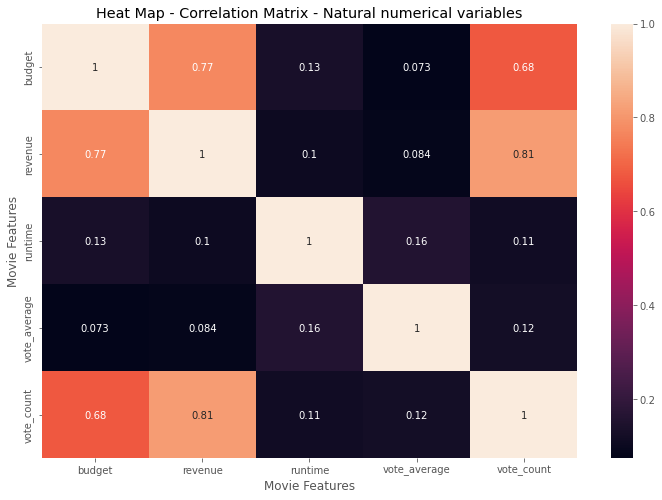

In [30]:
# Create a heat map for the correlation matrix
# Bright colors show high correlation
correlation_matrix= df.corr(method = 'pearson')
sns.heatmap(correlation_matrix , annot = True)


plt.title('Heat Map - Correlation Matrix - Natural numerical variables')
plt.xlabel ( 'Movie Features')
plt.ylabel ( 'Movie Features')
plt.show ()

In [31]:
# Turn all columns to numbers (integers and floats)

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
       df_numerized [ col_name] = df_numerized[col_name].astype('category')
       df_numerized [col_name] = df_numerized[col_name].cat.codes
df_numerized

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,14,30000000.0,1407,1641,42811,17050,17,36901,26666,...,10675,373554033.0,81.0,1132,4,-1,39018,0,7.7,5415.0
1,0,-1,65000000.0,692,-1,43246,16810,17,16240,42915,...,10706,262797249.0,104.0,843,4,11958,16806,0,6.9,2413.0
2,0,147,0.0,218,-1,8245,16752,17,12790,3150,...,10711,0.0,101.0,1132,4,13393,13371,0,6.5,92.0
3,0,-1,16000000.0,2980,-1,22680,17080,17,38526,15856,...,10711,81452156.0,127.0,1132,4,5632,40428,0,6.1,34.0
4,0,1659,0.0,3202,-1,3366,16701,17,10834,26063,...,10507,76578911.0,106.0,1132,4,8980,11199,0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,-1,0.0,1542,4042,31757,45270,22,41017,31402,...,-1,0.0,90.0,1199,4,11922,29278,0,4.0,1.0
45462,0,-1,0.0,2004,-1,2099,37203,79,28084,12105,...,15388,0.0,360.0,1867,4,-1,6516,0,9.0,3.0
45463,0,-1,0.0,2563,-1,38798,23289,17,3994,42864,...,12718,0.0,90.0,1132,4,1052,4377,0,3.8,6.0
45464,0,-1,0.0,0,-1,15173,169,17,27128,23083,...,241,0.0,87.0,0,4,-1,26679,0,0.0,0.0


In [32]:
df_numerized.dtypes

adult                       int8
belongs_to_collection      int16
budget                   float64
genres                     int16
homepage                   int16
id                         int32
imdb_id                    int32
original_language           int8
original_title             int32
overview                   int32
popularity                 int32
poster_path                int32
production_companies       int16
production_countries       int16
release_date               int16
revenue                  float64
runtime                  float64
spoken_languages           int16
status                      int8
tagline                    int16
title                      int32
video                       int8
vote_average             float64
vote_count               float64
dtype: object

In [33]:
df_numerized.corr() # all possible correlations 24 x 24

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
adult,1.000000,-0.003940,-0.003345,0.012350,0.000920,0.005582,0.005180,-0.004444,-0.004864,0.000179,...,0.000317,-0.002452,-0.009029,0.000598,-0.019053,0.005995,-0.006002,-0.000637,-0.012403,-0.002922
belongs_to_collection,-0.003940,1.000000,0.163268,-0.005895,0.046767,-0.006669,-0.017359,0.003289,0.004432,0.050305,...,0.004722,0.204693,0.005046,0.035570,0.003049,0.079375,-0.012107,-0.009192,0.039106,0.179573
budget,-0.003345,0.163268,1.000000,-0.030055,0.169971,-0.000961,0.072750,-0.071762,-0.001549,0.031076,...,0.131849,0.768776,0.134733,0.002578,0.007958,0.190412,0.009898,-0.010831,0.073494,0.676642
genres,0.012350,-0.005895,-0.030055,1.000000,0.053601,0.021746,0.067321,-0.057486,-0.028418,0.000821,...,0.073418,-0.032218,0.015067,0.054691,0.010926,0.070321,-0.013786,-0.033804,0.060394,-0.013201
homepage,0.000920,0.046767,0.169971,0.053601,1.000000,0.015013,0.300014,-0.049857,0.042405,0.031238,...,0.297282,0.159154,0.037878,0.000181,-0.007489,0.074458,0.044409,0.014687,0.061241,0.179507
id,0.005582,-0.006669,-0.000961,0.021746,0.015013,1.000000,-0.034898,0.035391,0.021985,-0.009683,...,-0.035574,0.009771,0.000085,0.020620,-0.007771,0.003209,0.021186,-0.003012,0.028126,0.000605
imdb_id,0.005180,-0.017359,0.072750,0.067321,0.300014,-0.034898,1.000000,0.080955,-0.022490,0.012161,...,0.931049,0.049427,-0.029496,0.000416,-0.036514,-0.086341,-0.067006,0.027431,0.012260,0.071651
original_language,-0.004444,0.003289,-0.071762,-0.057486,-0.049857,0.035391,0.080955,1.000000,0.165769,-0.006131,...,0.048020,-0.055917,0.046216,0.403162,0.004522,-0.178581,0.007810,-0.010154,0.072990,-0.066738
original_title,-0.004864,0.004432,-0.001549,-0.028418,0.042405,0.021985,-0.022490,0.165769,1.000000,0.044871,...,-0.035765,0.000275,0.045372,0.085959,0.002065,-0.026283,0.727137,0.012971,0.044654,-0.005527
overview,0.000179,0.050305,0.031076,0.000821,0.031238,-0.009683,0.012161,-0.006131,0.044871,1.000000,...,0.015024,0.027788,0.047842,0.010968,0.018639,0.019020,0.037242,0.004477,0.027306,0.024413


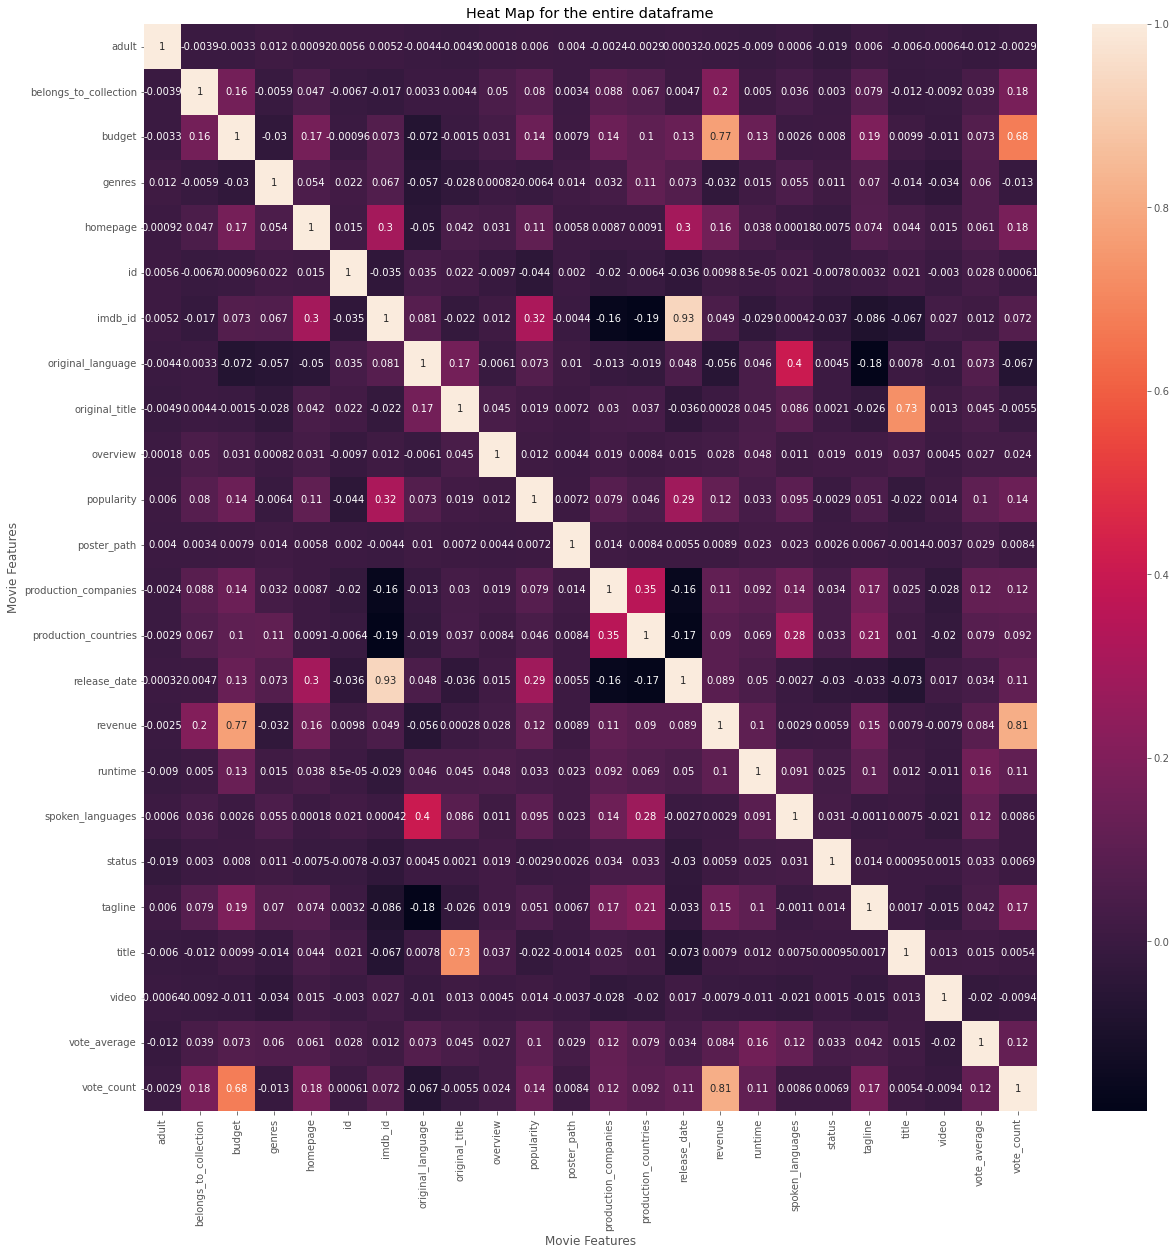

In [34]:
correlation_matrix= df_numerized.corr(method = 'pearson')
plt.figure(figsize=(20,20))  # Resize so all the cell values are readable
sns.heatmap(correlation_matrix , annot = True)


plt.title('Heat Map for the entire dataframe')
plt.xlabel ( 'Movie Features')
plt.ylabel ( 'Movie Features')
plt.show ()

In [35]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack ()
corr_pairs

adult       adult                    1.000000
            belongs_to_collection   -0.003940
            budget                  -0.003345
            genres                   0.012350
            homepage                 0.000920
                                       ...   
vote_count  tagline                  0.172359
            title                    0.005354
            video                   -0.009378
            vote_average             0.123607
            vote_count               1.000000
Length: 576, dtype: float64

In [36]:
sorted_pairs = corr_pairs.sort_values(ascending=False)

# Find the highest correlated pairs , ignore identical pairs
high_corr1 = sorted_pairs[  (sorted_pairs) >0.3  ]
high_corr2 =  high_corr1 [high_corr1 < 1]
high_corr2

release_date          imdb_id                 0.931049
imdb_id               release_date            0.931049
vote_count            revenue                 0.812022
revenue               vote_count              0.812022
                      budget                  0.768776
budget                revenue                 0.768776
original_title        title                   0.727137
title                 original_title          0.727137
budget                vote_count              0.676642
vote_count            budget                  0.676642
original_language     spoken_languages        0.403162
spoken_languages      original_language       0.403162
production_countries  production_companies    0.353850
production_companies  production_countries    0.353850
imdb_id               popularity              0.318551
popularity            imdb_id                 0.318551
imdb_id               homepage                0.300014
homepage              imdb_id                 0.300014
dtype: flo